In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the train and test datasets
train_path = "../data/processed/2024/train.csv"
test_path = "../data/processed/2024/test.csv"

train_df = pd.read_csv(train_path, parse_dates=['Trip_Start', 'Trip_End'])
test_df = pd.read_csv(test_path, parse_dates=['Trip_Start', 'Trip_End'])

train_df = train_df.sample(frac=0.01, random_state=42) 
test_df = test_df.sample(frac=0.01, random_state=42) 

# Quick inspection of the datasets
print("Train DataFrame:")
print(train_df.info())
print("\nTest DataFrame:")
print(test_df.info())

Train DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 43058 entries, 3825046 to 1001825
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Trip_Id         43058 non-null  int64         
 1   User_Id         43058 non-null  int64         
 2   Gender          43058 non-null  int64         
 3   Year_of_Birth   43058 non-null  float64       
 4   Trip_Start      43058 non-null  datetime64[ns]
 5   Trip_End        43058 non-null  datetime64[ns]
 6   Origin_Id       43058 non-null  int64         
 7   Destination_Id  43058 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 3.0 MB
None

Test DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 3401 entries, 223229 to 201727
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Trip_Id         3401 non-null   int64       

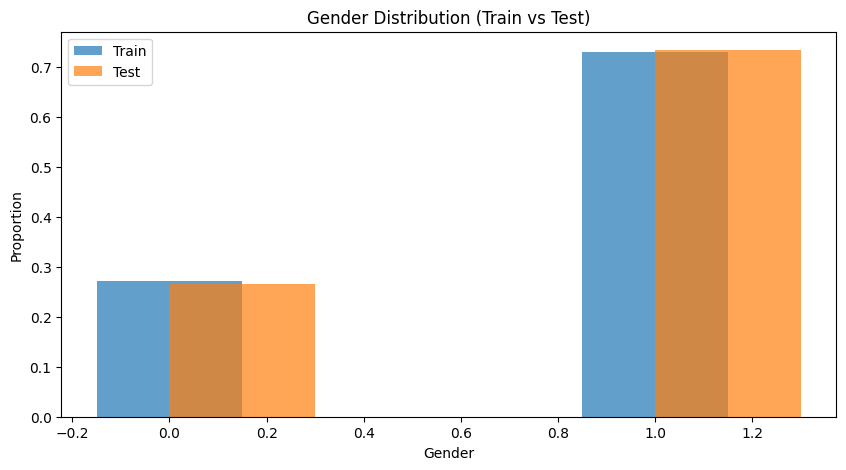

In [2]:
# Compare the datasets with charts
# 1. Distribution of Gender
plt.figure(figsize=(10, 5))
train_gender = train_df['Gender'].value_counts(normalize=True)
test_gender = test_df['Gender'].value_counts(normalize=True)

plt.bar(train_gender.index, train_gender.values, alpha=0.7, label='Train', width=0.3, align='center')
plt.bar(test_gender.index, test_gender.values, alpha=0.7, label='Test', width=0.3, align='edge')
plt.title("Gender Distribution (Train vs Test)")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend()
plt.show()

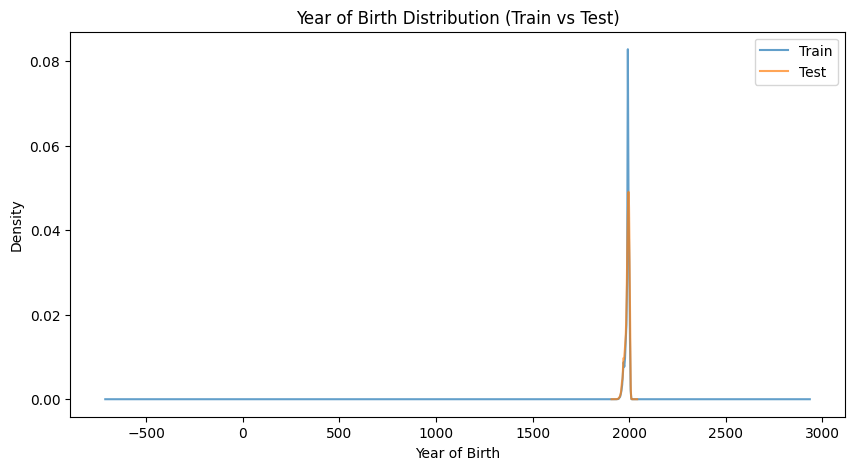

In [3]:
# 2. Distribution of Year of Birth
plt.figure(figsize=(10, 5))
train_df['Year_of_Birth'].plot(kind='density', label='Train', alpha=0.7)
test_df['Year_of_Birth'].plot(kind='density', label='Test', alpha=0.7)
plt.title("Year of Birth Distribution (Train vs Test)")
plt.xlabel("Year of Birth")
plt.ylabel("Density")
plt.legend()
plt.show()

In [4]:
# Define the valid range for Year_of_Birth
min_year = 1940
max_year = 2022

# Filter or cap Year_of_Birth to stay within the valid range
train_df['Year_of_Birth'] = train_df['Year_of_Birth'].clip(lower=min_year, upper=max_year)
test_df['Year_of_Birth'] = test_df['Year_of_Birth'].clip(lower=min_year, upper=max_year)

# Verify the range of Year_of_Birth
print("Train Year_of_Birth Range:")
print(train_df['Year_of_Birth'].describe())

print("\nTest Year_of_Birth Range:")
print(test_df['Year_of_Birth'].describe())

Train Year_of_Birth Range:
count    43058.000000
mean      1990.441172
std          9.891221
min       1940.000000
25%       1987.000000
50%       1993.000000
75%       1997.000000
max       2022.000000
Name: Year_of_Birth, dtype: float64

Test Year_of_Birth Range:
count    3401.000000
mean     1989.996766
std        10.935896
min      1942.000000
25%      1985.000000
50%      1993.000000
75%      1998.000000
max      2008.000000
Name: Year_of_Birth, dtype: float64


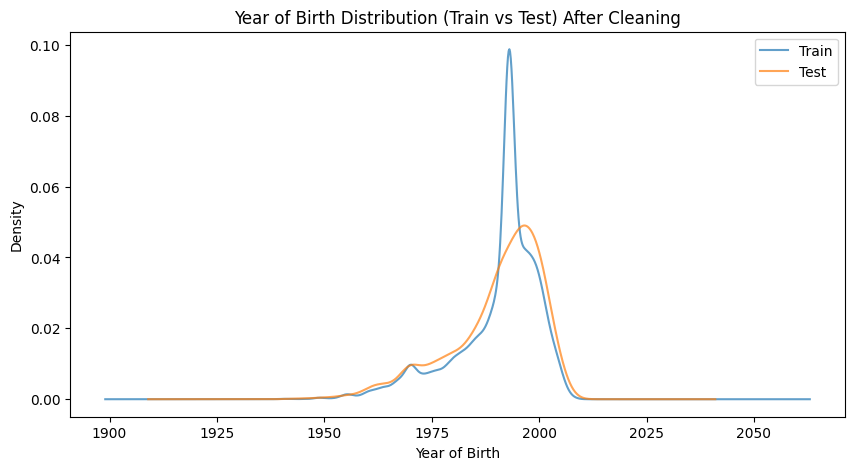

In [5]:
# 2. Distribution of Year of Birth
plt.figure(figsize=(10, 5))
train_df['Year_of_Birth'].plot(kind='density', label='Train', alpha=0.7)
test_df['Year_of_Birth'].plot(kind='density', label='Test', alpha=0.7)
plt.title("Year of Birth Distribution (Train vs Test) After Cleaning")
plt.xlabel("Year of Birth")
plt.ylabel("Density")
plt.legend()
plt.show()

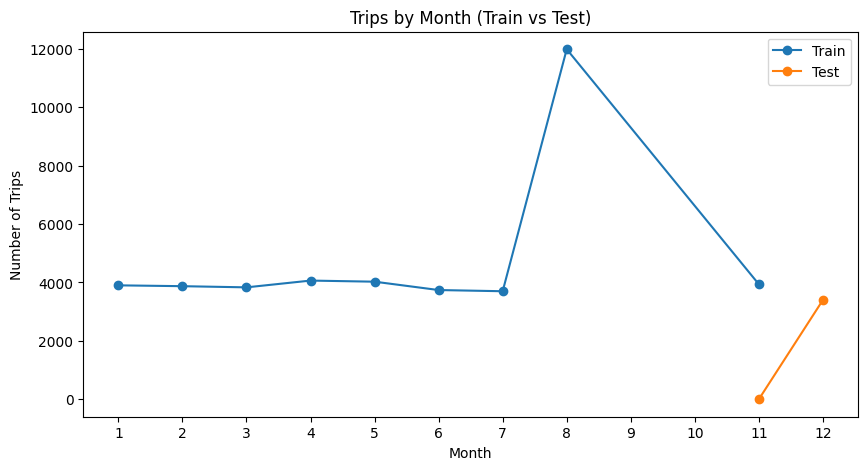

In [6]:
# 3. Distribution of Trip Start Times by Month
plt.figure(figsize=(10, 5))
train_df['Trip_Month'] = train_df['Trip_Start'].dt.month
test_df['Trip_Month'] = test_df['Trip_Start'].dt.month

train_month_counts = train_df['Trip_Month'].value_counts().sort_index()
test_month_counts = test_df['Trip_Month'].value_counts().sort_index()

plt.plot(train_month_counts.index, train_month_counts.values, marker='o', label='Train')
plt.plot(test_month_counts.index, test_month_counts.values, marker='o', label='Test')
plt.title("Trips by Month (Train vs Test)")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 13))
plt.legend()
plt.show()

In [7]:
train_df.columns

Index(['Trip_Id', 'User_Id', 'Gender', 'Year_of_Birth', 'Trip_Start',
       'Trip_End', 'Origin_Id', 'Destination_Id', 'Trip_Month'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Prepare the data (drop non-numerical or unnecessary columns)
columns_to_use = ['Gender',
                  'Year_of_Birth',
                  'Origin_Id',
                  'Destination_Id',
                  'Trip_Month']  
X = train_df[columns_to_use].dropna() 

# Optional: Scale the data (important for PCA and clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering (e.g., KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


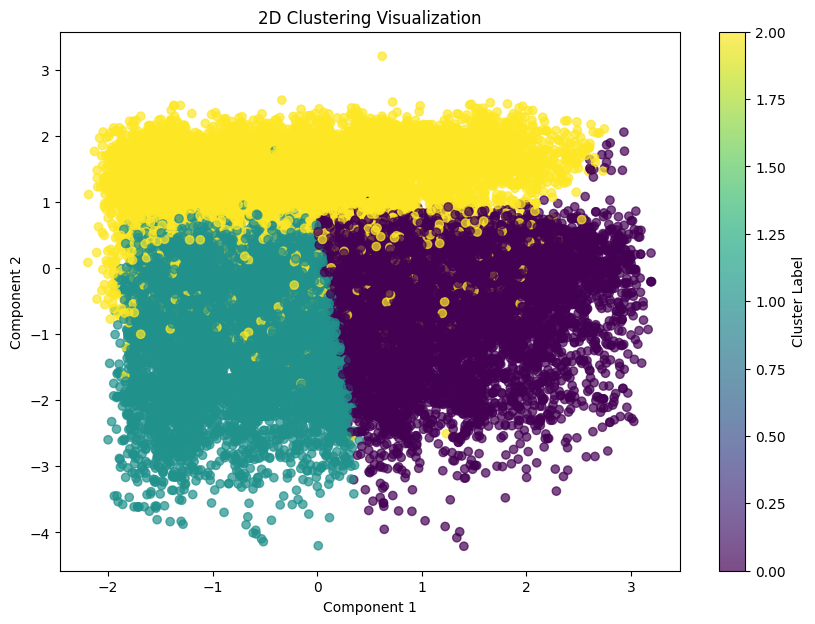

In [9]:
# Reduce dimensions for 2D plotting (using PCA or t-SNE)
# Option 1: PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Option 2: t-SNE (useful for non-linear data)
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_scaled)

# Choose one of the reduced datasets for plotting
X_reduced = X_pca  # Or use X_tsne for t-SNE

# Plot the clusters in 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster Label")
plt.title("2D Clustering Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

c:\Users\ivanr\AppData\Local\anaconda3\envs\l73.10\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ivanr\AppData\Local\anaconda3\envs\l73.10\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


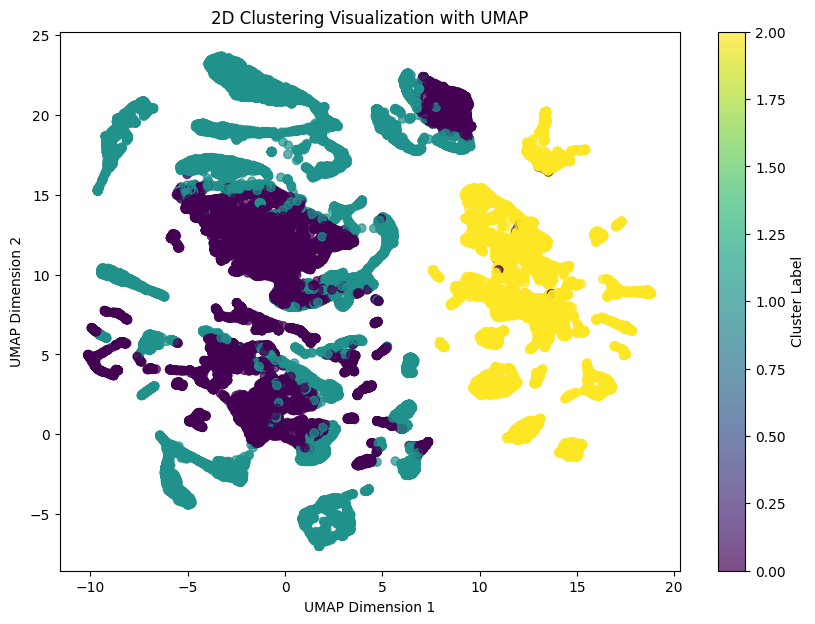

In [10]:
import umap

# Dimensionality reduction using UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster Label")
plt.title("2D Clustering Visualization with UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [11]:
plt.savefig("../reports/figures/umap_2d_K3")

<Figure size 640x480 with 0 Axes>